In [5]:
import numpy as np
import pandas as pd
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 20.2 MB/s eta 0:00:00


In [50]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel("/data/ESG_raw_data_07_02.xlsx")

In [11]:
print(len(pd.unique(data["primary_industry"])))

154


154 catégories différentes pour les primary_industry, il faudrait peut-être les regrouper un peu pour pouvoir exploiter ça en statdesc.

Test : prendre une catégorie de primary_industry et regarder si on a des choses intéressantes de réduction des émissions ou des dépenses énergétiques. Travailler sur le fait de faire des efforts. 

In [135]:
variables = ["scope_1", "scope_2", "scope_3", "waste_production",
             "waste_recycling", "water_consumption", "water_withdrawal",
             "energy_consumption", "hours_of_training", "independent_board_members_percentage",
             "legal_costs_paid_for_controversies", "ceo_compensation", "gender_pay_gap"]

variables_env =  ["scope_1", "scope_2", "scope_3", "waste_production",
             "waste_recycling", "water_consumption", "water_withdrawal",
             "energy_consumption"]

In [18]:
def isnan(num) :
    if num != num : 
        return True
    else :
        return False

def isntnan(num) :
    return bool(1 - int(isnan(num)))

def nanin(col) :
    for x in col :
        if isnan(x) :
            return True
    return False

In [136]:
#data_test = data.loc[data["primary_industry"] == "Pharmaceuticals"]
data_test = data
for x in variables_env :
    data_test[x] = data_test[x]/data_test['employees']

In [137]:
years = ["2018", "2019", "2020"]

def evolution(col) :
    companies = pd.unique(data_test["company_id"])
    evo = []
    other = []
    for x in companies : 
        t = data_test.loc[data_test["company_id"] == x]
        
        if not nanin(t[col]) and not nanin(t["gender_pay_gap"]) :
            res = [t.loc[t["year"] == 2018][col].iloc[0], t.loc[t["year"] == 2019][col].iloc[0], t.loc[t["year"] == 2020][col].iloc[0]]
            evo1 = 100*(res[1] - res[0])/res[0]
            evo2 = 100*(res[2] - res[1])/res[1]
            evo.append([evo1, evo2])

            other.append(max(t["gender_pay_gap"]))

    print(other)

    x = [evo[i][0] for i in range (len(evo))]
    y = [evo[i][1] for i in range (len(evo))]
    
    plot = plt.scatter(x, y, c = other, cmap = 'viridis')
    bar = plt.colorbar(plot, label='gender_pay_gap')

    plt.ylim((-100,100))
    plt.xlim((-100,100))
    plt.grid(True)
    plt.title(col)
    plt.show()

[0.4000000000000004, 33.63, 3.0, 0.0, 1.800000000000002, 1.000000000000001, 28.0, 16.0, 7.999999999999996, 1.5, 24.78, 0.0, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 23.077, 21.0, 5.300000000000004, 18.0, 33.4, 3.700000000000003, 14.0, 23.0, 23.67, 24.1, 5.800000000000005, 6.730000000000004, 38.9, 20.0, 15.4, 5.500000000000005, 30.0, 13.0, 16.8, 25.0, 21.15]


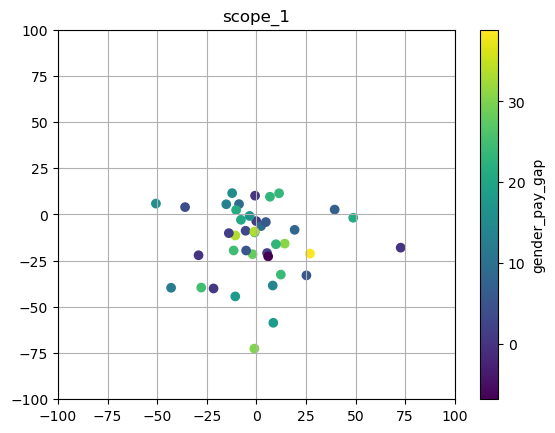

[0.4000000000000004, 33.63, 3.0, 0.0, 1.800000000000002, 1.000000000000001, 28.0, 16.0, 7.999999999999996, 1.5, 24.78, 0.0, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 23.077, 21.0, 5.300000000000004, 18.0, 33.4, 3.700000000000003, 14.0, 23.0, 23.67, 24.1, 6.730000000000004, 38.9, 20.0, 15.4, 5.500000000000005, 30.0, 13.0, 16.8, 25.0, 21.15]


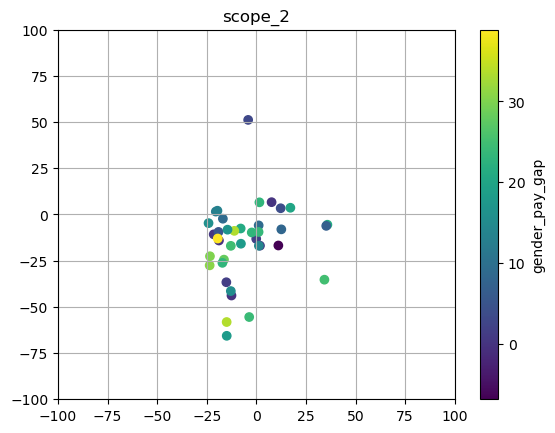

[0.4000000000000004, 33.63, 3.0, 0.0, 1.800000000000002, 1.000000000000001, 28.0, 16.0, 7.999999999999996, 1.5, 24.78, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 23.077, 5.300000000000004, 18.0, 3.700000000000003, 14.0, 23.0, 23.67, 24.1, 5.800000000000005, 6.730000000000004, 38.9, 15.4, 5.500000000000005, 25.0, 21.15]


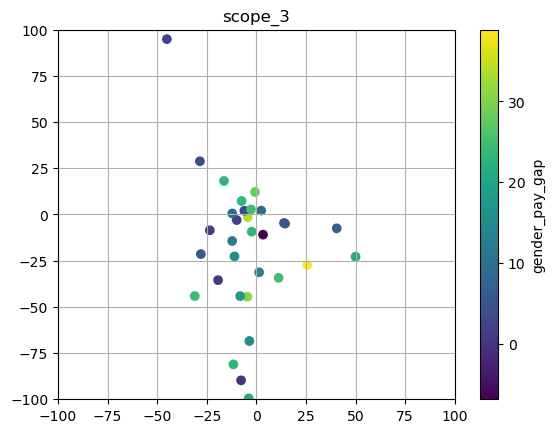

[0.4000000000000004, 33.63, 3.0, 0.0, 1.800000000000002, 28.0, 16.0, 7.999999999999996, 1.5, 0.0, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 21.0, 5.300000000000004, 14.0, 23.0, 23.67, 5.800000000000005, 6.730000000000004, 38.9, 20.0, 13.0, 7.999999999999996, 32.69, 43.00000000000001, 25.0, 25.0, 12.0, 24.2]


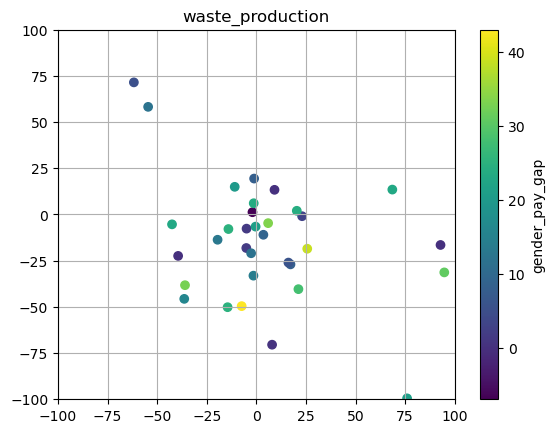

[0.4000000000000004, 0.0, 1.800000000000002, 28.0, 7.999999999999996, 1.5, 0.0, 23.0, -6.899999999999995, 12.1, 9.0, 21.0, 23.0, 23.67, 5.800000000000005, 6.730000000000004, 38.9, 20.0, 7.999999999999996, 12.0]


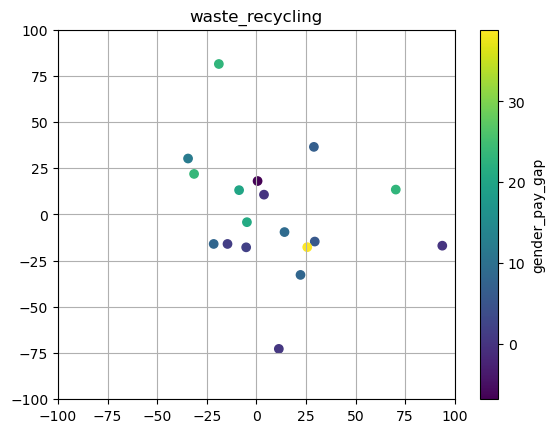

[0.4000000000000004, 33.63, 3.0, 0.0, 16.0, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 23.077, 21.0, 5.300000000000004, 3.700000000000003, 14.0, 23.0, 5.800000000000005, 6.730000000000004, 38.9, 13.0, 32.69, 25.0, 12.0]


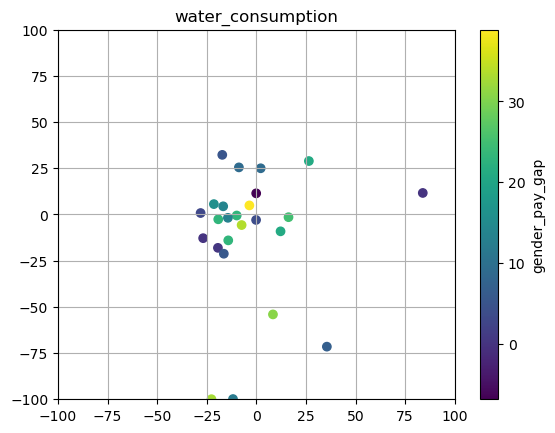

[33.63, 3.0, 0.0, 16.0, 7.999999999999996, 1.5, 0.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 21.0, 5.300000000000004, 14.0, 6.730000000000004, 38.9, 13.0, 16.8]


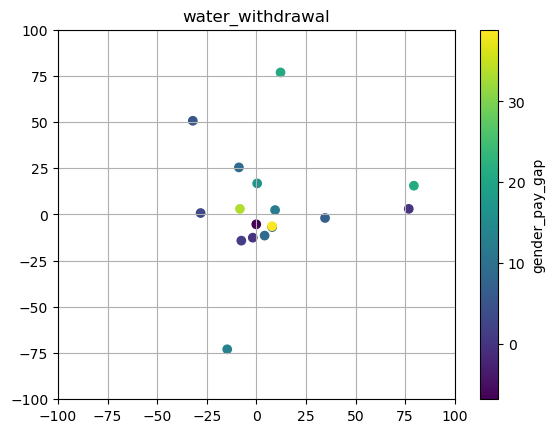

[0.4000000000000004, 33.63, 3.0, 0.0, 16.0, 7.999999999999996, 1.5, 24.78, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 21.0, 5.300000000000004, 33.4, 14.0, 23.0, 5.800000000000005, 6.730000000000004, 20.0, 5.500000000000005, 13.0, 16.8, 7.999999999999996, 32.69, 43.00000000000001, 25.0, 21.15, 25.0, 12.0, 24.2]


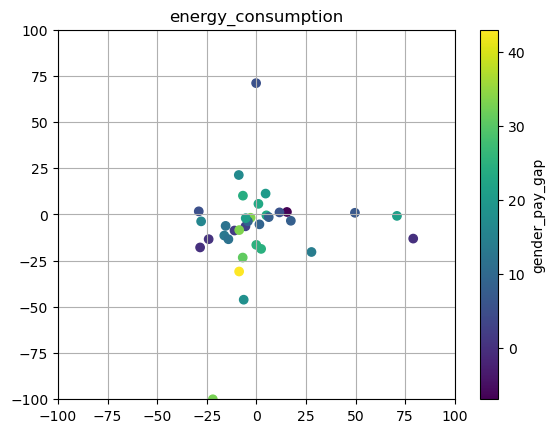

[33.63, 3.0, 0.0, 28.0, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 23.077, 5.300000000000004, 23.0, 23.67, 5.800000000000005, 6.730000000000004, 38.9, 13.0, 7.999999999999996, 32.69, 25.0, 21.15, 12.0, 24.2]


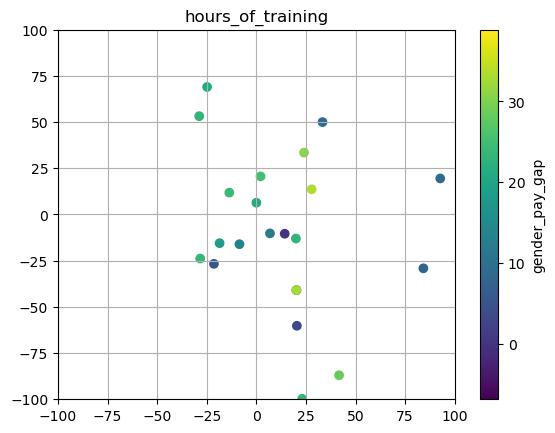

[0.4000000000000004, 33.63, 3.0, 0.0, 1.800000000000002, 1.000000000000001, 28.0, 16.0, 7.999999999999996, 1.5, 24.78, 0.0, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 23.077, 21.0, 5.300000000000004, 17.0, 33.4, 3.700000000000003, 14.0, 23.0, 23.67, 24.1, 5.800000000000005, 6.730000000000004, 38.9, 20.0, 15.4, 5.500000000000005, 30.0, 13.0, 16.8, 7.999999999999996, 32.69, 43.00000000000001, 25.0, 5.700000000000003, 21.15, 25.0, 12.0, 24.2]


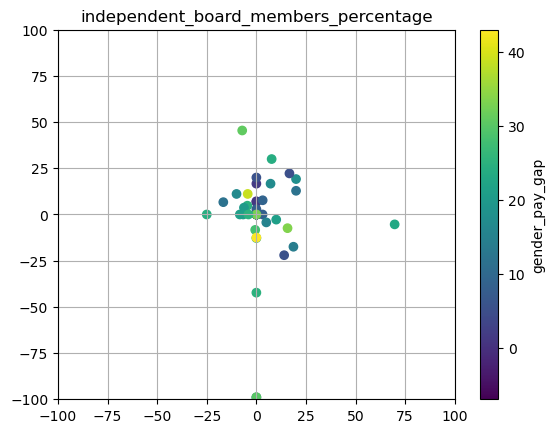

[33.63, 0.0, 1.800000000000002, 28.0, 7.999999999999996, 24.78, 0.0, 21.0, -6.899999999999995, 12.1, 30.8, 9.0, 21.0, 24.1, 6.730000000000004, 20.0, 7.999999999999996, 25.0, 5.700000000000003, 21.15, 12.0]


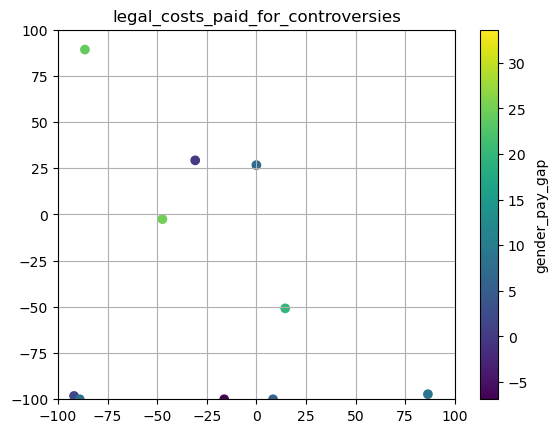

[0.4000000000000004, 33.63, 3.0, 0.0, 16.0, 7.999999999999996, 1.5, 24.78, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 21.0, 5.300000000000004, 33.4, 14.0, 23.0, 38.9, 20.0, 15.4, 5.500000000000005, 30.0, 13.0, 16.8, 32.69, 25.0, 32.8]


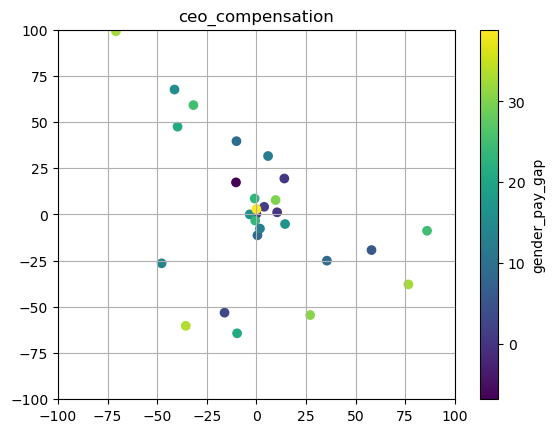

/tmp/ipykernel_193/3160996327.py:13: RuntimeWarning: invalid value encountered in scalar divide
  evo2 = 100*(res[2] - res[1])/res[1]
/tmp/ipykernel_193/3160996327.py:12: RuntimeWarning: invalid value encountered in scalar divide
  evo1 = 100*(res[1] - res[0])/res[0]
/tmp/ipykernel_193/3160996327.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  evo1 = 100*(res[1] - res[0])/res[0]


[0.4000000000000004, 33.63, 3.0, 0.0, 1.800000000000002, 1.000000000000001, 28.0, 16.0, 7.999999999999996, 1.5, 24.78, 0.0, 0.0, 23.0, 21.0, 8.899999999999997, -6.899999999999995, 12.1, 30.8, 9.0, 18.0, 23.077, 21.0, 5.300000000000004, 18.0, 17.0, 33.4, 3.700000000000003, 14.0, 23.0, 23.67, 24.1, 5.800000000000005, 6.730000000000004, 38.9, 20.0, 15.4, 5.500000000000005, 30.0, 13.0, 16.8, 7.999999999999996, 32.69, 43.00000000000001, 25.0, 5.700000000000003, 21.15, 32.8, 25.0, 12.0, 24.2]


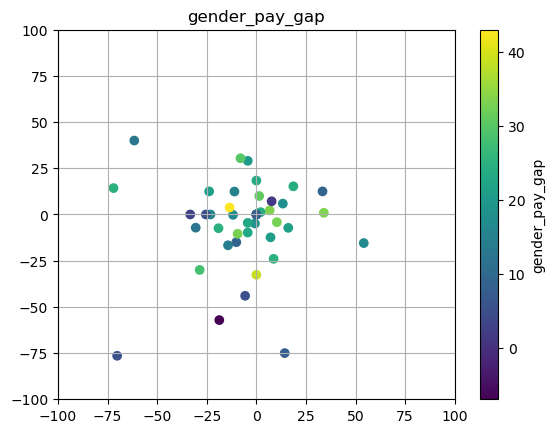

In [138]:
for col in variables :
    evolution(col)

In [139]:
def slope(x) :
    n = len(x)
    if n == 1 : return 0
    elif n == 2 : return x[1] - x[0]
    elif n == 3 : return 0.5*((x[2] - x[1]) + (x[1] - x[0]))

In [140]:
def evolution2(col) :
    companies = pd.unique(data_test["company_id"])
    evo = []
    other = []
    for x in companies : 
        t = data_test.loc[data_test["company_id"] == x]
        
        if not nanin(t[col]) and not nanin(t["gender_pay_gap"]) :
            res = [t.loc[t["year"] == 2018][col].iloc[0], t.loc[t["year"] == 2019][col].iloc[0], t.loc[t["year"] == 2020][col].iloc[0]]
            evo1 = 100*(res[1] - res[0])/res[0]
            evo2 = 100*(res[2] - res[1])/res[1]
            evo.append([evo1, evo2])

            other.append(slope(np.array(t["gender_pay_gap"])))

    x = [evo[i][0] for i in range (len(evo))]
    y = [evo[i][1] for i in range (len(evo))]
    
    plot = plt.scatter(x, y, c = other, cmap = 'viridis')
    bar = plt.colorbar(plot, label='slope gender_pay_gap')

    plt.ylim((-100,100))
    plt.xlim((-100,100))
    plt.grid(True)
    plt.title(col)
    plt.show()

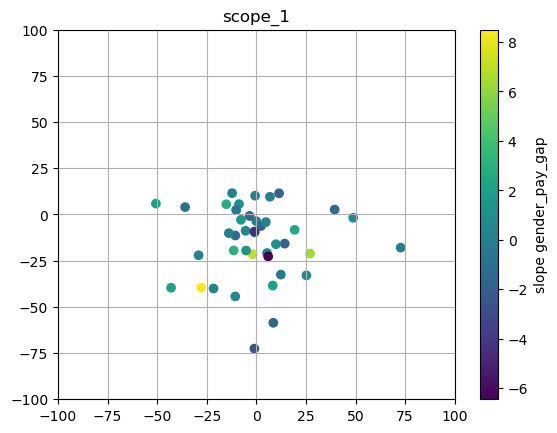

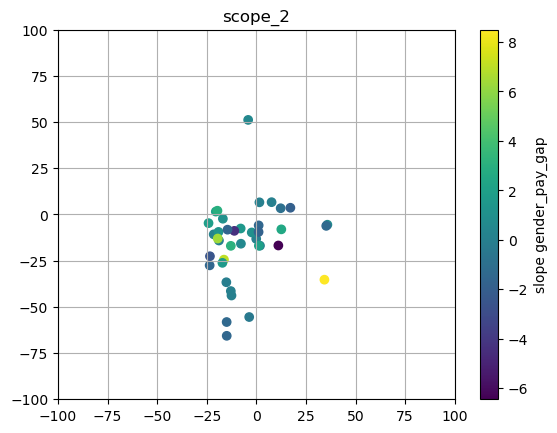

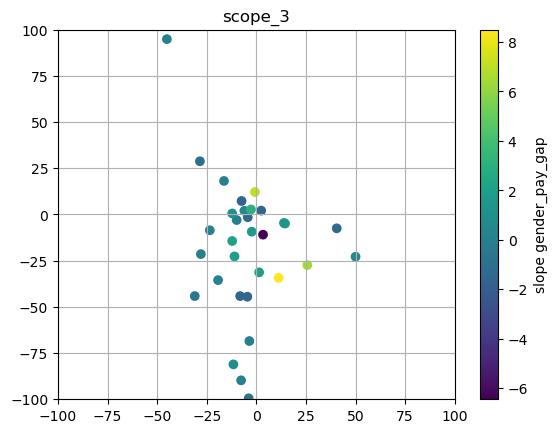

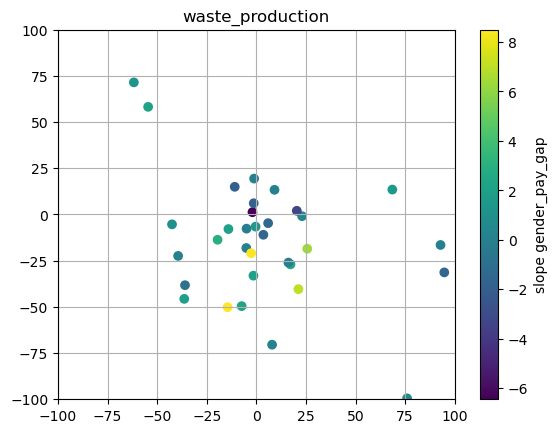

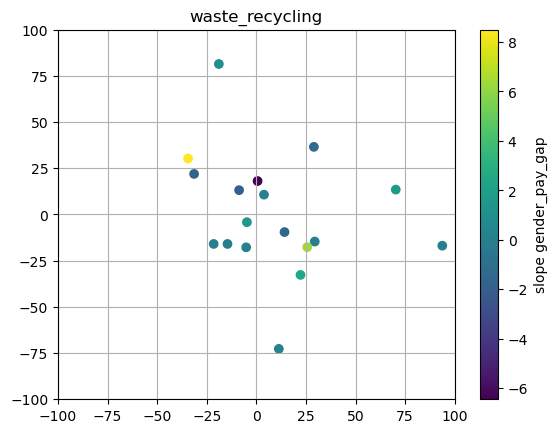

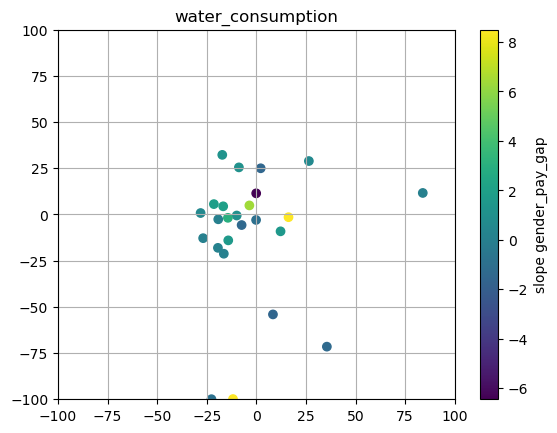

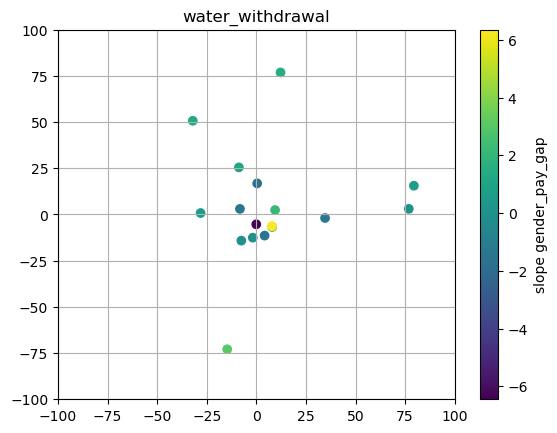

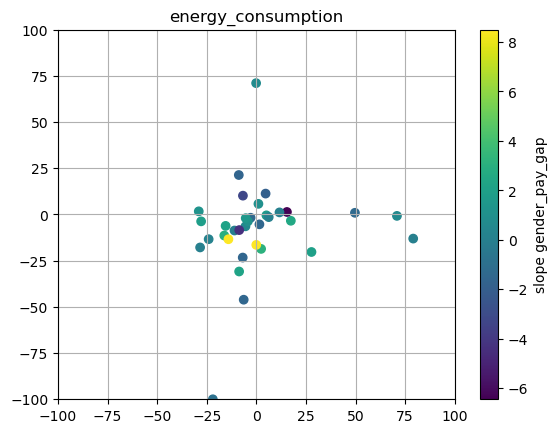

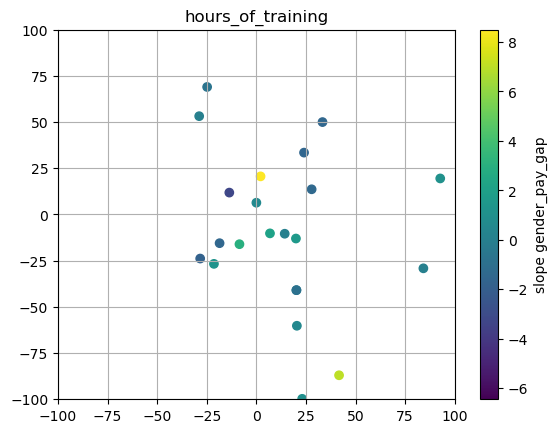

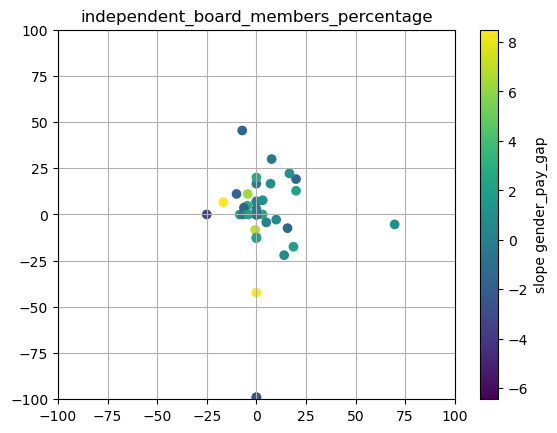

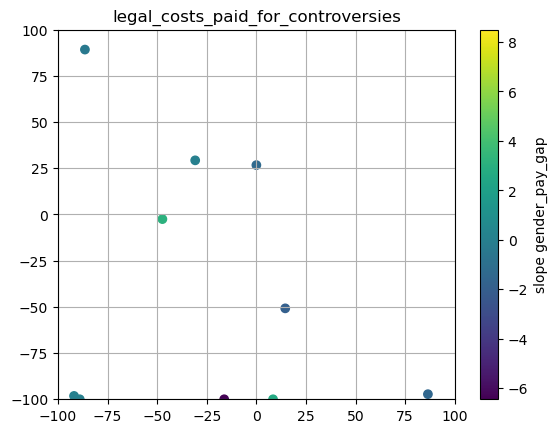

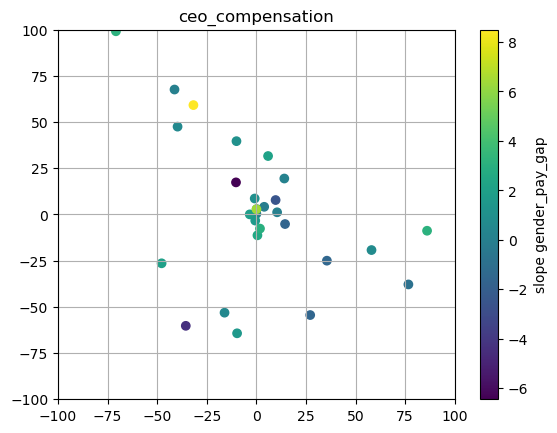

/tmp/ipykernel_193/1007465179.py:11: RuntimeWarning: invalid value encountered in scalar divide
  evo2 = 100*(res[2] - res[1])/res[1]
/tmp/ipykernel_193/1007465179.py:10: RuntimeWarning: invalid value encountered in scalar divide
  evo1 = 100*(res[1] - res[0])/res[0]
/tmp/ipykernel_193/1007465179.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  evo1 = 100*(res[1] - res[0])/res[0]


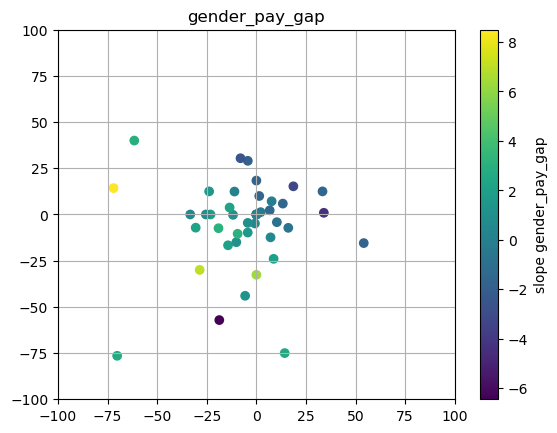

In [141]:
for col in variables :
    evolution2(col)

On va faire quelques Statdesc. Par exemple, quelles regions donnent le plus accès aux données, ou bien les distributions de certaines variables en fonction de la région ou du secteur d'activité.

In [173]:
df  = data_test

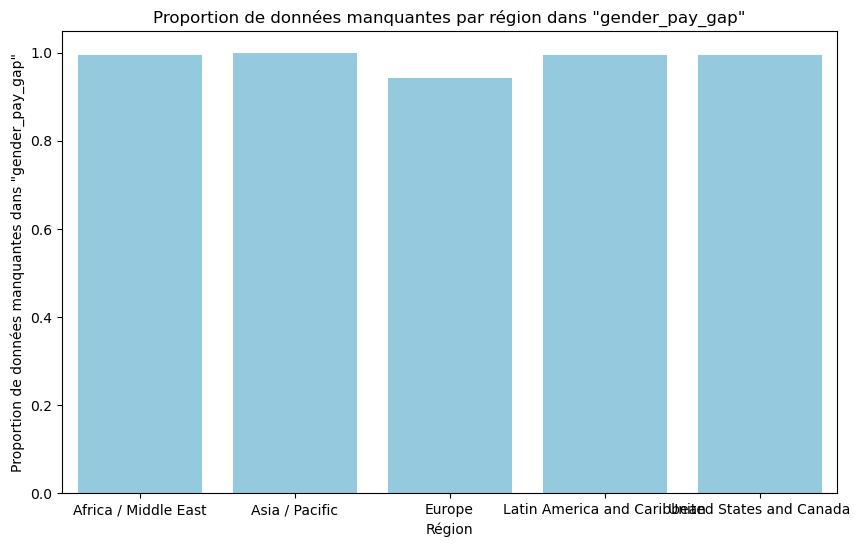

In [143]:
import seaborn as sns

missing_data = df["gender_pay_gap"].isnull()
missing_proportions = missing_data.groupby(df['region']).mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_proportions.index, y=missing_proportions.values, color='skyblue')
plt.xlabel('Région')
plt.ylabel('Proportion de données manquantes dans "gender_pay_gap"')
plt.title('Proportion de données manquantes par région dans "gender_pay_gap"')
plt.show()

In [144]:
print(missing_proportions)

region
Africa / Middle East           0.995056
Asia / Pacific                 0.998765
Europe                         0.941810
Latin America and Caribbean    0.994497
United States and Canada       0.995381
Name: gender_pay_gap, dtype: float64


In [145]:
print(missing_data.groupby(df['region']).count() - missing_data.groupby(df['region']).sum())

region
Africa / Middle East             7
Asia / Pacific                  30
Europe                         324
Latin America and Caribbean      7
United States and Canada        37
Name: gender_pay_gap, dtype: int64


/tmp/ipykernel_193/536701603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='gender_pay_gap', data=df, palette='Set2')


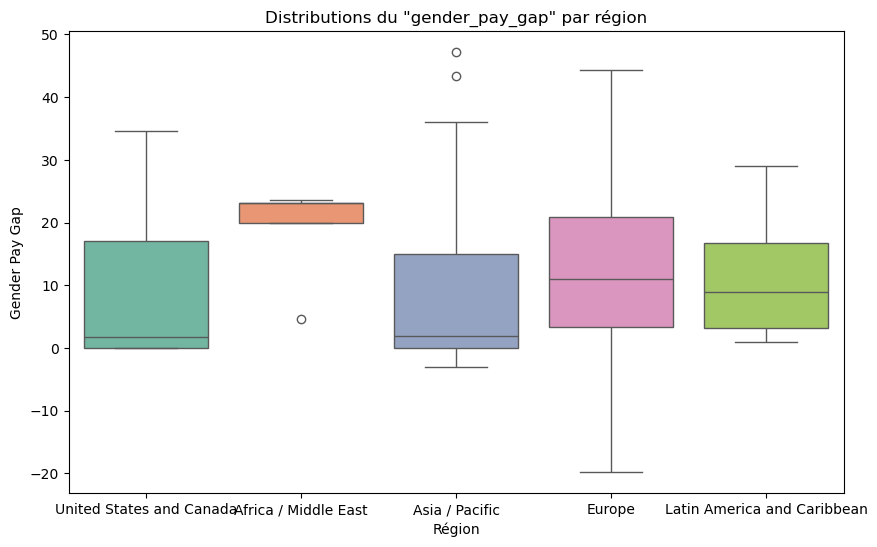

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='gender_pay_gap', data=df, palette='Set2')
plt.xlabel('Région')
plt.ylabel('Gender Pay Gap')
plt.title('Distributions du "gender_pay_gap" par région')
plt.show()

/tmp/ipykernel_193/3186163235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='primary_industry', y='gender_pay_gap', data=df, palette='Set2')


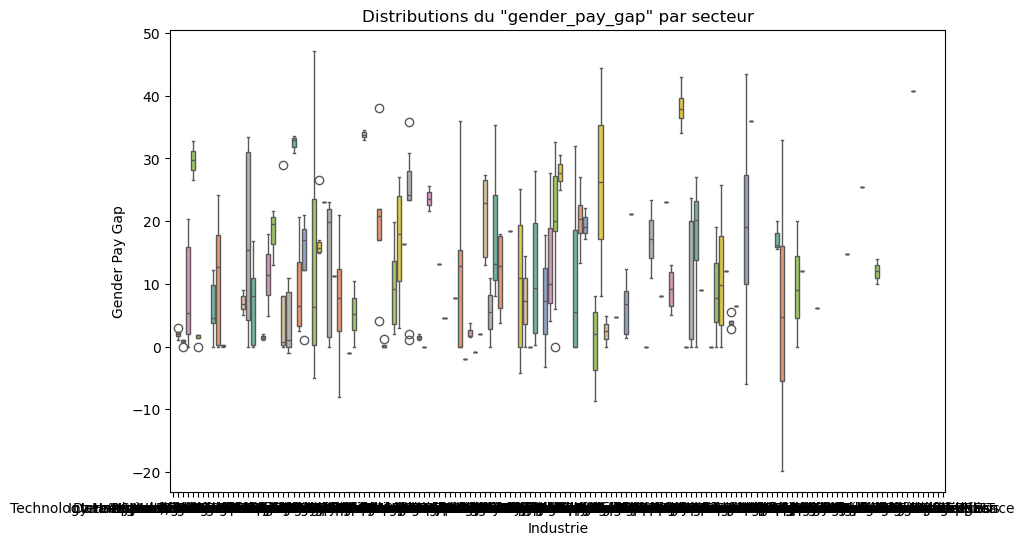

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_industry', y='gender_pay_gap', data=df, palette='Set2')
plt.xlabel('Industrie')
plt.ylabel('Gender Pay Gap')
plt.title('Distributions du "gender_pay_gap" par secteur')
plt.show()

Horrible à regarder, ce qu'on peut faire c'est se focaliser sur des secteurs avec un minimum de données.

In [107]:
missing_proportions_by_industry = df.groupby('primary_industry')['gender_pay_gap'].apply(lambda x: x.isnull().mean())

# On prend les 20 meilleures
top_20_industries = missing_proportions_by_industry.sort_values().head(20).index.tolist()

In [108]:
print(top_20_industries)

['Homebuilding', 'Multi-line Insurance', 'Household Products', 'Multi-Utilities', 'Data Processing and Outsourced Services', 'Property and Casualty Insurance', 'Integrated Oil and Gas', 'Electric Utilities', 'Integrated Telecommunication Services', 'Research and Consulting Services', 'Life and Health Insurance', 'Water Utilities', 'Food Retail', 'Financial Exchanges and Data', 'Real Estate Operating Companies', 'IT Consulting and Other Services', 'Distributors', 'Other Diversified Financial Services', 'Diversified Chemicals', 'Tobacco']


/tmp/ipykernel_193/2007964992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='primary_industry', y='gender_pay_gap', data=df2, palette='Set2')


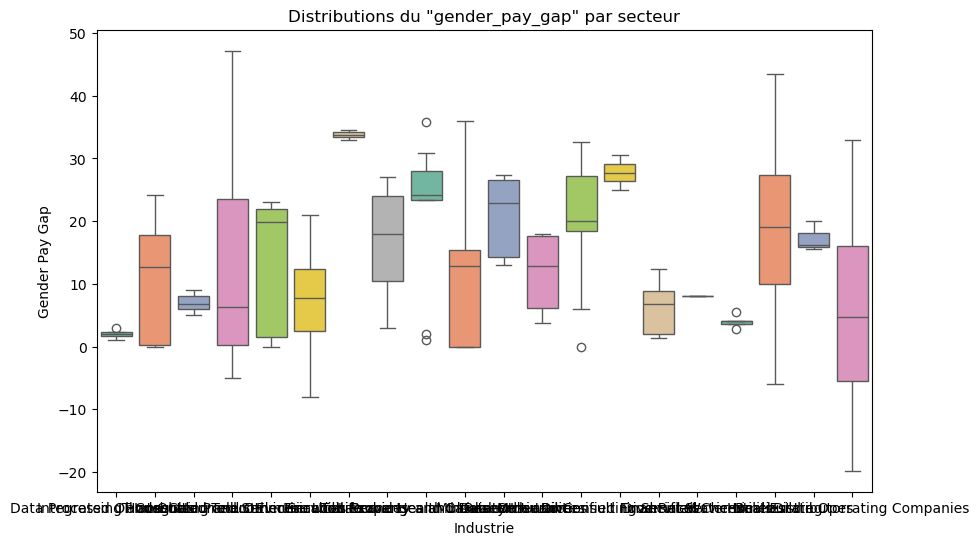

In [110]:
df2 = df[df["primary_industry"].isin(top_20_industries)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_industry', y='gender_pay_gap', data=df2, palette='Set2')
plt.xlabel('Industrie')
plt.ylabel('Gender Pay Gap')
plt.title('Distributions du "gender_pay_gap" par secteur')
plt.show()

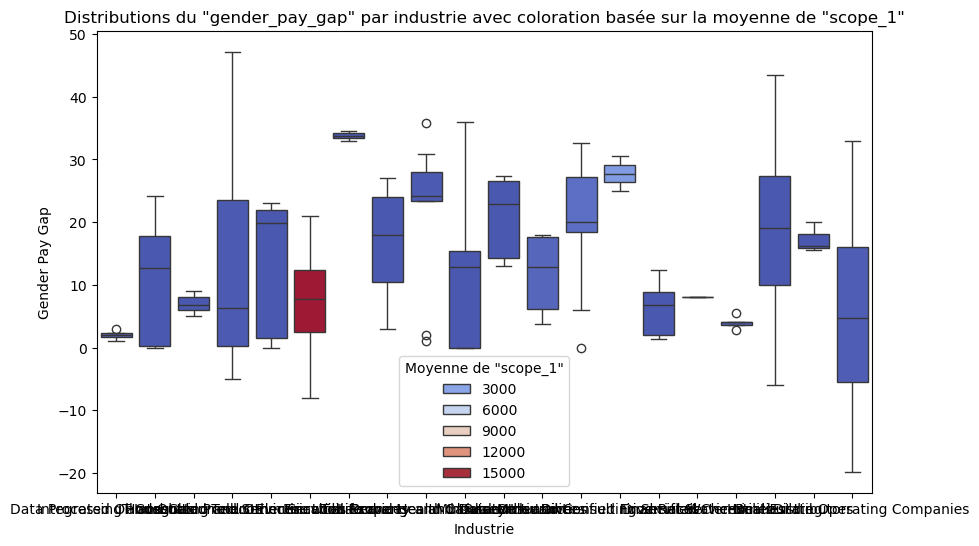

In [148]:
mean_scope_1_by_industry = df.groupby('primary_industry')['scope_1'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_industry', y='gender_pay_gap', data=df2, palette='coolwarm', hue=df2['primary_industry'].map(mean_scope_1_by_industry))
plt.xlabel('Industrie')
plt.ylabel('Gender Pay Gap')
plt.title('Distributions du "gender_pay_gap" par industrie avec coloration basée sur la moyenne de "scope_1"')
plt.legend(title='Moyenne de "scope_1"')
plt.show()

In [149]:
missing_proportions = df.groupby('primary_industry')['gender_pay_gap'].apply(lambda x: x.isnull().mean())

print("Proportions de données manquantes pour 'gender_pay_gap' par 'primary_industry':")
print(missing_proportions)


Proportions de données manquantes pour 'gender_pay_gap' par 'primary_industry':
primary_industry
Advertising                            0.979167
Aerospace and Defense                  0.981912
Agricultural Products                  1.000000
Agricultural and Farm Machinery        1.000000
Air Freight and Logistics              0.995614
                                         ...   
Tobacco                                0.974359
Trading Companies and Distributors     0.995526
Trucking                               1.000000
Water Utilities                        0.964539
Wireless Telecommunication Services    0.983333
Name: gender_pay_gap, Length: 154, dtype: float64


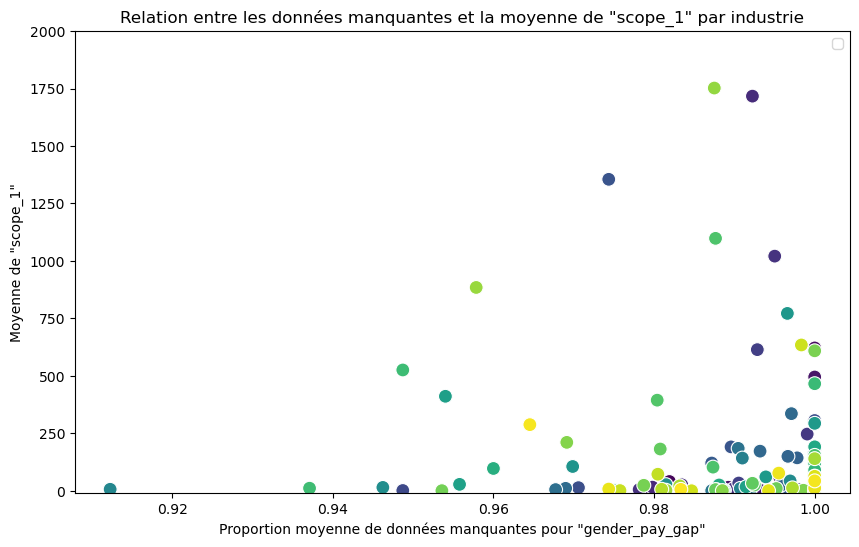

In [162]:
missing_mean = df.groupby('primary_industry')['gender_pay_gap'].apply(lambda x: x.isnull().mean())
scope_1_mean = df.groupby('primary_industry')['scope_1'].mean()

# Créez un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=missing_mean, y=scope_1_mean, hue=missing_mean.index, palette='viridis', s=100)
plt.xlabel('Proportion moyenne de données manquantes pour "gender_pay_gap"')
plt.ylabel('Moyenne de "scope_1"')
plt.title('Relation entre les données manquantes et la moyenne de "scope_1" par industrie')
#plt.legend(title='Primary Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend('')
plt.ylim((-10, 2000))
plt.show()

/opt/mamba/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            OLS Regression Results                            
Dep. Variable:     missing_proportion   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     95.91
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          2.24e-136
Time:                        21:29:49   Log-Likelihood:                 3349.5
No. Observations:               10687   AIC:                            -6683.
Df Residuals:                   10679   BIC:                            -6625.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

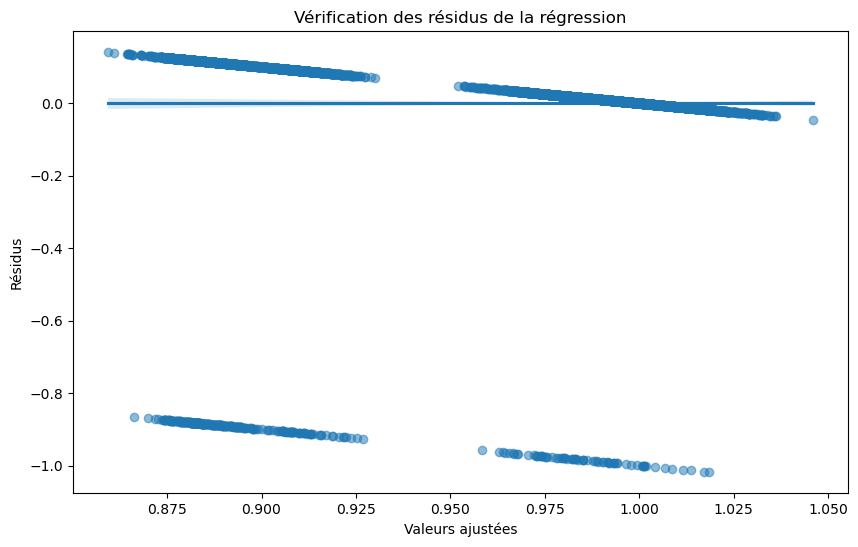

In [175]:
import statsmodels.api as sm

df7 = df

df7['missing_proportion'] = df7['gender_pay_gap'].isnull().astype(float)

df7['missing_proportion_log'] = np.log(df7['missing_proportion'])
df7['scope_1_log'] = np.log(df7['scope_1'])

# Régression linéaire avec contrôle sur la région et l'année
X = df7[['scope_1_log', 'region', 'year']]
X = pd.get_dummies(X, columns=['region', 'year'], drop_first=True, dtype=float)  # Assurez-vous du dtype=float ici
X = sm.add_constant(X)

# Filtrez les valeurs infinies ou NaN
mask = ~X.isin([np.nan, np.inf, -np.inf]).any(axis=1)
X = X[mask]
y = df7['missing_proportion'][mask]

model = sm.OLS(y, X).fit()

# Afficher les résultats de la régression
print(model.summary())

# Tracer la régression
plt.figure(figsize=(10, 6))
sns.regplot(x=model.fittedvalues, y=model.resid, scatter_kws={'alpha': 0.5})
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.title('Vérification des résidus de la régression')
plt.show()

On va regarder s'il y a un lien entre être "bon" en scope et "bon" en gender pay gap au sein de son secteur.

/tmp/ipykernel_193/3022828826.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='rank_scope', y='rank_gender', data=df4, palette='viridis', s=100)


Text(0.5, 1.0, "Relation entre rang de scope_1 et de gender_pay_gap au sein d'une même industrie")

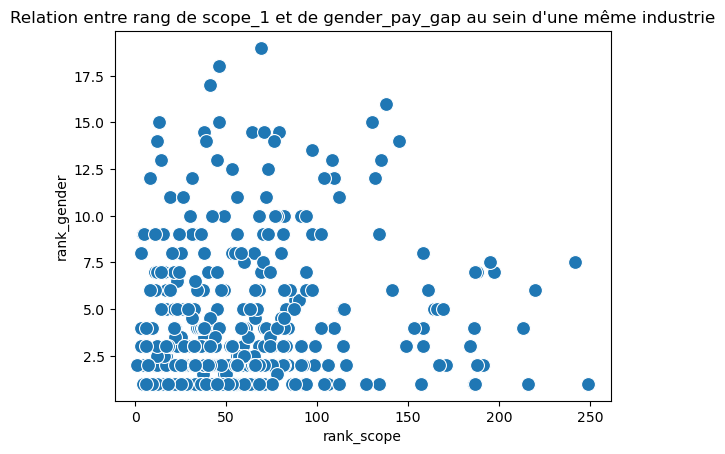

In [152]:
df4 = df
df4['rank_gender'] = df.groupby('primary_industry')['gender_pay_gap'].rank(ascending=False)
df4['rank_scope'] = df.groupby('primary_industry')['scope_1'].rank(ascending=False)

sns.scatterplot(x='rank_scope', y='rank_gender', data=df4, palette='viridis', s=100)
plt.title("Relation entre rang de scope_1 et de gender_pay_gap au sein d'une même industrie")

Je vais un peu plus loin : regarder pour chaque entreprise son rang non pas en scope_1 systématiquement mais dans le scope le plus émetteur pour son secteur. Ce n'est pas pertinent de comparer les entreprises de la banquassurance selon leur scope 1, mais bien selon leur scope 3.

/tmp/ipykernel_193/2382748068.py:6: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  most_emitting_scope = sector_means.idxmax(axis=1)
/tmp/ipykernel_193/2382748068.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['emission_rank'] = df8.apply(calculate_rank, axis=1)
/tmp/ipykernel_193/2382748068.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['rank_gender'] = df.groupby('primary_in

Text(0.5, 1.0, "Relation entre rang d'émissions et de gender_pay_gap au sein d'une même industrie")

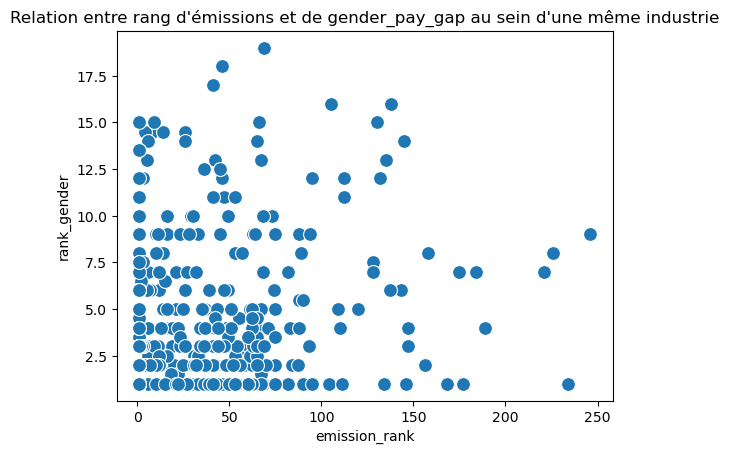

In [182]:
df8 = df

sector_means = df8.groupby('primary_industry').agg({'scope_1': 'mean', 'scope_2': 'mean', 'scope_3': 'mean'})

# Étape 2: Identifier le scope le plus émetteur pour chaque secteur
most_emitting_scope = sector_means.idxmax(axis=1)

# Étape 3: Calculer le rang de chaque entreprise en termes d'émissions pour le scope identifié comme le plus émetteur dans son secteur
df8['most_emitting_scope'] = df8['primary_industry'].map(most_emitting_scope)

filter_condition = df8['most_emitting_scope'].notna()
df8 = df8[filter_condition]

# Fonction pour calculer le rang
def calculate_rank(row):
    scope_column = row['most_emitting_scope']
    emissions_column = f'{scope_column}'
    sector_filter = df8['primary_industry'] == row['primary_industry']
    return (df8[emissions_column][sector_filter] > row[emissions_column]).sum() + 1

# Appliquer la fonction pour calculer le rang
df8['emission_rank'] = df8.apply(calculate_rank, axis=1)

df8['rank_gender'] = df.groupby('primary_industry')['gender_pay_gap'].rank(ascending=False)

sns.scatterplot(x='emission_rank', y='rank_gender', data=df8, palette='viridis', s=100)
plt.title("Relation entre rang d'émissions et de gender_pay_gap au sein d'une même industrie")

In [183]:
# Ajout de la constante pour le modèle de régression
X = df8[['emission_rank', 'region', 'year']]
X = pd.get_dummies(X, columns=['region', 'year'], drop_first=True, dtype=float)  # Assurez-vous du dtype=float ici
X = sm.add_constant(X)

# Régression linéaire en contrôlant sur la variable "region"
model = sm.OLS(df8['rank_gender'], X).fit()

# Afficher les résultats de la régression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            rank_gender   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 09 Feb 2024   Prob (F-statistic):                nan
Time:                        14:49:55   Log-Likelihood:                    nan
No. Observations:               40536   AIC:                               nan
Df Residuals:                   40528   BIC:                               nan
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Je vais essayer de voir si on voit pas apparaître un moment de reporting pour important qu'un autre en Europe, enfin plutôt un boom de reporting.

In [153]:
df5 = df.loc[df['region'] == 'Europe']
missing_data = df5["gender_pay_gap"].isnull()
missing_proportions = missing_data.groupby(df['year']).mean()

print(missing_proportions)

year
2018    0.971983
2019    0.960668
2020    0.892780
Name: gender_pay_gap, dtype: float64


Pas délirant mais quand même déjà ça entre 2019 et 2020.